# Assignment 7

**1.Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.**

**2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.**

**3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)**

**4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.**

**5. Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.**

**6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.**

**7. Isolate all the categorical column names into a list named ‘categorical’.**

**8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.**

**9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.**

**10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods**

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df_1 = df
df_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
X = df_1.drop('charges', 1)
y = df_1['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
c = df.corr()
c

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

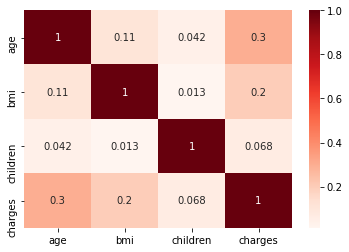

In [10]:
sns.heatmap(c, annot = True, cmap = 'Reds')

In [12]:
#df.duplicated()
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
df = df.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**3. . Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)**

<AxesSubplot:xlabel='age', ylabel='Density'>

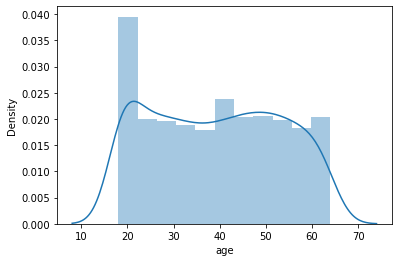

In [36]:
age = df.age
age
sns.distplot(age)

<AxesSubplot:>

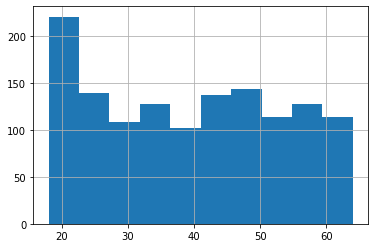

In [37]:
age.hist()

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

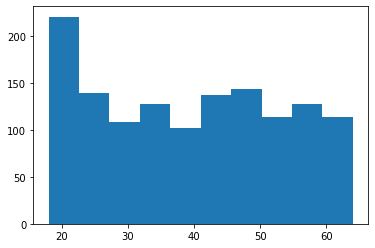

In [39]:
plt.hist(df['age'])

**4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.**

In [40]:
pd.pandas.set_option('display.max_columns', None)

In [41]:
numerical = [var for var in df_1.columns if df[var].dtype != 'object']
numerical

['age', 'bmi', 'children', 'charges']

In [42]:
df_1[['age', 'bmi', 'children', 'charges']].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [48]:
for item in numerical:
    if df_1[item].nunique() < 20:
        print('{} is discrete'.format(item))
    else:
        pass

children is discrete


In [49]:
numerical_discrete =  [var for var in numerical if 'children' in var]
numerical_discrete

['children']

In [51]:
numerical_continuous = [var for var in numerical if var not in numerical_discrete ]
numerical_continuous

['age', 'bmi', 'charges']

In [52]:
numerical_continuous.remove('charges')

In [53]:
numerical_continuous

['age', 'bmi']

**5.  Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.**

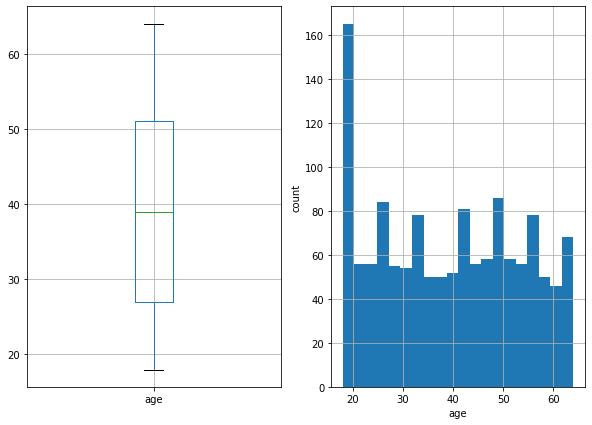

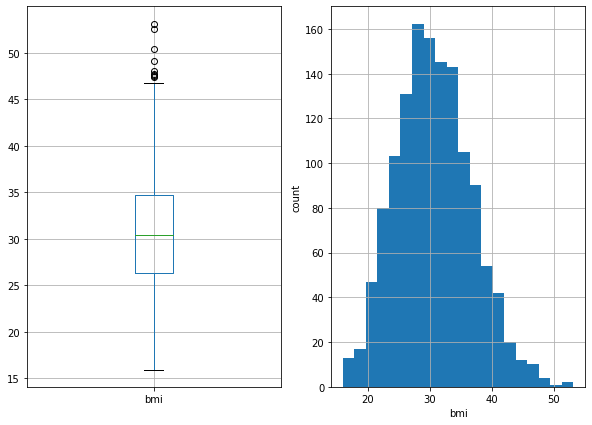

In [56]:
for var in numerical_continuous:
    plt.figure(figsize =(10,7))
    plt.subplot(1,2,1)
    fig = df.boxplot(column = var)
    
    plt.subplot(1,2,2)
    fig = df[var].hist(bins = 20)
    fig.set_ylabel('count')
    fig.set_xlabel(var)
    

(X - U)/sd

In [57]:
df['zscore_bmi'] = (df.bmi - df.bmi.mean())/df.bmi.std()
df.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990
1,18,male,33.770,1,no,southeast,1725.55230,0.509231
2,28,male,33.000,3,no,southeast,4449.46200,0.383011
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347


In [90]:
df_2 = df[(df.zscore_bmi < -2)|(df.zscore_bmi > 2)]
df_2.head(2)

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
28,23,13974.998864,17.385,12731.171832,8440.660307,12450.840844,2775.19215,-2.176628
116,58,13974.998864,49.060,12384.695344,8440.660307,14735.411438,11381.32540,3.015596


In [63]:
df_no_bmi_outliers = df[(df.zscore_bmi > -2)&(df.zscore_bmi < 2)]
df_no_bmi_outliers.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990
1,18,male,33.770,1,no,southeast,1725.55230,0.509231
2,28,male,33.000,3,no,southeast,4449.46200,0.383011
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347


In [64]:
df_no_bmi_outliers.shape

(1280, 8)

In [67]:
df.shape[0] - df_no_bmi_outliers.shape[0]

57

<AxesSubplot:>

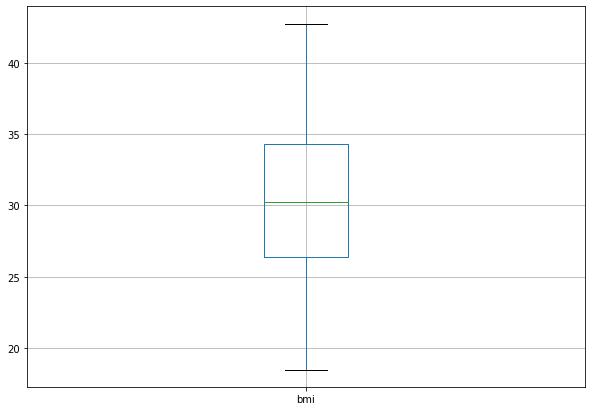

In [65]:
plt.figure(figsize = (10,7))
df_no_bmi_outliers.boxplot(column = 'bmi')

In [68]:
categorical = [var for var in df_1.columns if df[var].dtype == 'object']
categorical

['sex', 'smoker', 'region']

**8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.**

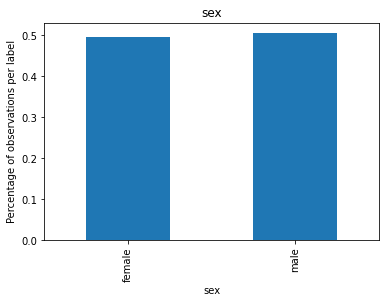

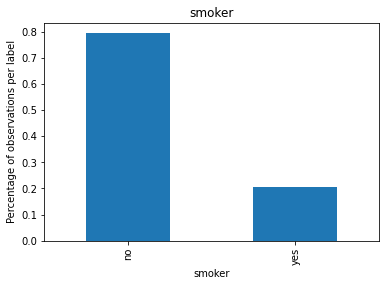

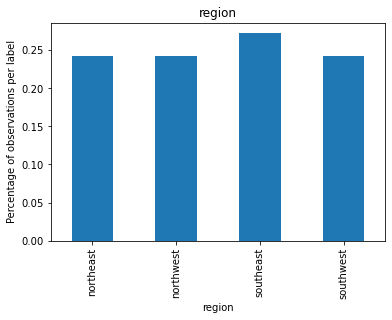

In [70]:
for var in categorical:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

**9.  Encode the discrete and categorical features with one of the measures of central tendency of your choosing.**

In [81]:
def encode_cat_vars(var, target):
    ordered_labels = df.groupby([var])[target].mean().to_dict()
    df[var] = df[var].map(ordered_labels)
    
    
for var in categorical:
    encode_cat_vars(var,'charges')
for var in numerical_discrete:
    encode_cat_vars(var,'charges')
df.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,12569.578844,27.900,12384.695344,32050.231832,12346.937377,16884.92400,-0.452990
1,18,13974.998864,33.770,12731.171832,8440.660307,14735.411438,1725.55230,0.509231
2,28,13974.998864,33.000,15355.318367,8440.660307,14735.411438,4449.46200,0.383011
3,33,13974.998864,22.705,12384.695344,8440.660307,12450.840844,21984.47061,-1.304564
4,32,13974.998864,28.880,12384.695344,8440.660307,12450.840844,3866.85520,-0.292347


**10.  Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.**

In [82]:
X = df_1.drop('charges', 1)
y = df_1['charges']
X.head()

,age,sex,bmi,children,smoker,region,zscore_bmi
0,19,12569.578844,27.900,12384.695344,32050.231832,12346.937377,-0.452990
1,18,13974.998864,33.770,12731.171832,8440.660307,14735.411438,0.509231
2,28,13974.998864,33.000,15355.318367,8440.660307,14735.411438,0.383011
3,33,13974.998864,22.705,12384.695344,8440.660307,12450.840844,-1.304564
4,32,13974.998864,28.880,12384.695344,8440.660307,12450.840844,-0.292347


In [83]:
X.drop('zscore_bmi', axis = 1, inplace = True)

In [85]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,12569.578844,27.900,12384.695344,32050.231832,12346.937377
1,18,13974.998864,33.770,12731.171832,8440.660307,14735.411438
2,28,13974.998864,33.000,15355.318367,8440.660307,14735.411438
3,33,13974.998864,22.705,12384.695344,8440.660307,12450.840844
4,32,13974.998864,28.880,12384.695344,8440.660307,12450.840844


In [86]:
import statsmodels.api as sm

In [87]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const       8.183739e-08
age         2.709288e-88
sex         7.559177e-01
bmi         2.161231e-29
children    1.975844e-03
smoker      0.000000e+00
region      5.411975e-01
dtype: float64

In [89]:
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.6):
        cols.remove(feature_with_p_max)
    else:
        break
    
selected_features = cols
selected_features

['age', 'bmi', 'children', 'smoker', 'region']